In [1]:
from sklearn.linear_model import LinearRegression
import numpy as np
import pandas as pd
import datetime as dt
import matplotlib.pyplot as plt


C:\Users\Duy Khanh\anaconda3\lib\site-packages\scipy\__init__.py:146: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.24.3
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


In [2]:
# Read dataset file
df = pd.read_csv('ETH.csv')
df = df[['Price']]
df = df.dropna() # Drop missing values
df

,Price
0,693.28
1,696.76
2,716.02
3,696.85
4,642.17
...,...
1822,1799.36
1823,1817.11
1824,1823.98
1825,1821.73


In [3]:
# Split the data into training, testing, and validation sets
train_size = int(0.6 * len(df))
test_size = int(0.3 * len(df))
val_size = len(df) - train_size - test_size

train_data = df[:train_size]
test_data = df[train_size:train_size+test_size]
val_data = df[train_size+test_size:]

In [4]:
#Holt-Winters Exponential Smoothing model
x_train = np.array(train_data.index).reshape(-1, 1)
y_train = np.array(train_data['Price'])
# Define the model
model = LinearRegression()
# Train the model
model.fit(x_train, y_train)

LinearRegression()

In [5]:
# make predictions on the testing set
x_test = np.array(test_data.index).reshape(-1, 1)
y_test = np.array(test_data['Price'])
y_pred = model.predict(x_test)

# make predictions on the validate set
x_val = np.array(val_data.index).reshape(-1, 1)
y_val = np.array(val_data['Price'])
y_vpred = model.predict(x_val)

In [6]:
# Forecast the next 30 days
last_index =  df.index[-1]
last_data = pd.RangeIndex(start=last_index, stop=last_index+30, step=1)

# Create an array of 30 consecutive integers starting from last_index
x_next_30_days = np.array(range(last_index+1, last_index+31)).reshape(-1, 1)

# Predict the closing prices for the next 30 days
y_next_30_days = model.predict(x_next_30_days)

# Print the predicted closing prices for the next 30 days
print('Predicted Bitcoin closing prices for the next 30 days:')
y_next_30_days

Predicted Bitcoin closing prices for the next 30 days:


array([1886.70942384, 1887.81512423, 1888.92082462, 1890.02652501,
       1891.1322254 , 1892.23792578, 1893.34362617, 1894.44932656,
       1895.55502695, 1896.66072734, 1897.76642773, 1898.87212812,
       1899.97782851, 1901.0835289 , 1902.18922929, 1903.29492968,
       1904.40063007, 1905.50633046, 1906.61203085, 1907.71773124,
       1908.82343163, 1909.92913202, 1911.03483241, 1912.14053279,
       1913.24623318, 1914.35193357, 1915.45763396, 1916.56333435,
       1917.66903474, 1918.77473513])

In [7]:
# calculate the RMSE
valid_rmse = np.sqrt(np.mean((y_vpred - y_val)**2))
test_rmse = np.sqrt(np.mean((y_pred - y_test)**2))
print('Validation RMSE:', valid_rmse)
print('Testing RMSE:', test_rmse)

# calculate the MAPE
valid_mape = np.mean(np.abs((y_val - y_vpred) / y_val)) * 100
test_mape = np.mean(np.abs((y_test - y_pred) / y_test)) * 100
print("Validation MAPE:", valid_mape)
print("Testing MAPE:", test_mape)

# calculate the MAE
valid_mae = np.mean(np.abs(y_vpred - y_val))
test_mae = np.mean(np.abs(y_pred - y_test))
print("Validation MAE:", valid_mae)
print("Testing MAE:", test_mae)

Validation RMSE: 296.81162778978774
Testing RMSE: 1628.6312097514526
Validation MAPE: 17.25715282344813
Testing MAPE: 44.14112060939559
Validation MAE: 233.25305172405436
Testing MAE: 1318.1978889304726


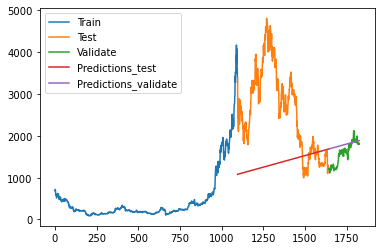

In [8]:
# ploting the actual values and predicted values
plt.plot(train_data.index, train_data['Price'])
plt.plot(test_data.index, test_data['Price'])
plt.plot(val_data.index, val_data['Price'])
plt.plot(test_data.index, y_pred)
plt.plot(val_data.index, y_vpred)

plt.legend(['Train', 'Test','Validate', 'Predictions_test','Predictions_validate'])
plt.show()